# Predicting mobile phone sales
This notebook uses an ANN to show why retraining can be harder than training from scratch in a changing environment. For this purpose, the notebook trains and retrains a perceptron that decides whether a customer will buy a particular mobile phone.

## Setup environment

In [39]:
# Imports
import sys
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Paths
DATA_PATH = "./data"
IMG_INITIAL_PATH = f"{DATA_PATH}/phone_sales_initial.png"
IMG_RETRAIN_PATH = f"{DATA_PATH}/phone_sales_retraining.png"
IMG_COMPARISON_PATH = f"{DATA_PATH}/phone_sales_comparison.png"

In [41]:
"""
This function partially trains a perceptron n times and returns the weights of every iteration
in a pandas data frame.
"""
def train_perceptron(perceptron, features, target, iterations):
    keypad_weights = []
    touch_weights = []
    low_price_weights = []
    
    for i in range(0, iterations):
        if hasattr(perceptron, "coef_"):
            keypad_weights.append(perceptron.coef_[0][0])
            touch_weights.append(perceptron.coef_[0][1])
            low_price_weights.append(perceptron.coef_[0][2])
        else:
            keypad_weights.append(0)
            touch_weights.append(0)
            low_price_weights.append(0)
        
        perceptron.partial_fit(features, target, classes=np.unique(target))

    return pd.DataFrame({
        "iteration": range(0, iterations),
        "keypad": keypad_weights,
        "touch": touch_weights,
        "low_price": low_price_weights
    })

## Create training data

In [42]:
# Create hypothetical phone sales data from 2000
phone_frame_2000 = pd.DataFrame({
    "keypad": [1, 1, 0, 0],
    "touch": [0, 0, 1, 1],
    "low_price": [1, 0, 0, 1],
    "sale": [1, 0, 0, 0]
})

phone_frame_2000.index.name = "ID"
phone_frame_2000.to_csv(sys.stdout)

ID,keypad,touch,low_price,sale
0,1,0,1,1
1,1,0,0,0
2,0,1,0,0
3,0,1,1,0


In [43]:
# Create hypothetical phone sales data from 2007
phone_frame_2007 = pd.DataFrame({
    "keypad": [1, 1, 0, 0],
    "touch": [0, 0, 1, 1],
    "low_price": [1, 0, 0, 1],
    "sale": [0, 0, 1, 1]
})

phone_frame_2007.index.name = "ID"
phone_frame_2007.to_csv(sys.stdout)

ID,keypad,touch,low_price,sale
0,1,0,1,0
1,1,0,0,0
2,0,1,0,1
3,0,1,1,1


## Initial training with data from 2000

In [44]:
# Initialize a perceptron without bias
perceptron = Perceptron(fit_intercept=False)

In [45]:
# Initial training parameters
x_2000 = phone_frame_2000[["keypad", "touch", "low_price"]]
y_2000 = phone_frame_2000["sale"]

In [46]:
# Perform training
weights_2000 = train_perceptron(perceptron, x_2000, y_2000, iterations=10)
print(weights_2000)

   iteration  keypad  touch  low_price
0          0     0.0    0.0        0.0
1          1     0.0   -1.0        0.0
2          2     0.0   -1.0        1.0
3          3     0.0   -2.0        1.0
4          4     0.0   -2.0        2.0
5          5     0.0   -3.0        2.0
6          6    -1.0   -3.0        2.0
7          7    -1.0   -3.0        2.0
8          8    -1.0   -3.0        2.0
9          9    -1.0   -3.0        2.0


In [47]:
# Test model
y_2000_pred = perceptron.predict(x_2000)
print(y_2000_pred)

accuracy_2000 = accuracy_score(y_2000, y_2000_pred)
print(f"Accuracy: {accuracy_2000 * 100:.2f}%")

[1 0 0 0]
Accuracy: 100.00%


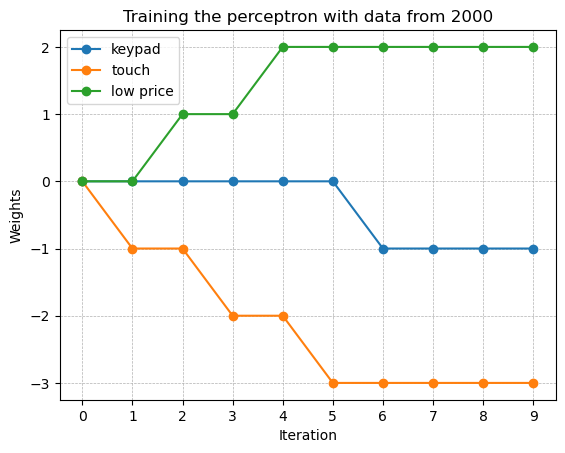

In [48]:
# Visualize training process
plt.title("Training the perceptron with data from 2000")
plt.plot(weights_2000['iteration'], weights_2000['keypad'], label='keypad', marker='o')
plt.plot(weights_2000['iteration'], weights_2000['touch'], label='touch', marker='o')
plt.plot(weights_2000['iteration'], weights_2000['low_price'], label='low price', marker='o')
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(weights_2000['iteration'])

plt.savefig(IMG_INITIAL_PATH, dpi=300)
plt.show()

## Retraining with data from 2007

In [49]:
# Changed training parameters
x_2007 = phone_frame_2007[["keypad", "touch", "low_price"]]
y_2007 = phone_frame_2007["sale"]

In [50]:
# Retrain with data from 2007
weights_2007 = train_perceptron(perceptron, x_2007, y_2007, iterations=10)
print(weights_2007)

   iteration  keypad  touch  low_price
0          0    -1.0   -3.0        2.0
1          1    -2.0   -1.0        2.0
2          2    -3.0    0.0        1.0
3          3    -3.0    1.0        1.0
4          4    -3.0    1.0        1.0
5          5    -3.0    1.0        1.0
6          6    -3.0    1.0        1.0
7          7    -3.0    1.0        1.0
8          8    -3.0    1.0        1.0
9          9    -3.0    1.0        1.0


In [51]:
# Test retrained model
y_2007_pred = perceptron.predict(x_2007)
print(y_2007_pred)

accuracy_2007 = accuracy_score(y_2007, y_2007_pred)
print(f"Accuracy: {accuracy_2007 * 100:.2f}%")

[0 0 1 1]
Accuracy: 100.00%


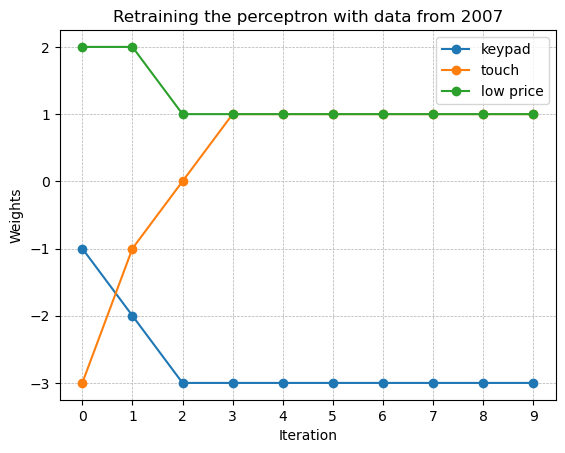

In [52]:
# Plot retraining process
plt.title("Retraining the perceptron with data from 2007")
plt.plot(weights_2007['iteration'], weights_2007['keypad'], label='keypad', marker='o')
plt.plot(weights_2007['iteration'], weights_2007['touch'], label='touch', marker='o')
plt.plot(weights_2007['iteration'], weights_2007['low_price'], label='low price', marker='o')
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(weights_2007['iteration'])

plt.savefig(IMG_RETRAIN_PATH, dpi=300)
plt.show()

## Training from scratch with data from 2007

In [53]:
# Create a new perceptron
perceptron_new = Perceptron(fit_intercept=False)

In [54]:
# Train from scratch with data from 2007
weights_2007_new = train_perceptron(perceptron_new, x_2007, y_2007, iterations=10)
print(weights_2007_new)

   iteration  keypad  touch  low_price
0          0     0.0    0.0        0.0
1          1    -2.0    1.0        0.0
2          2    -2.0    1.0        0.0
3          3    -2.0    1.0        0.0
4          4    -2.0    1.0        0.0
5          5    -2.0    1.0        0.0
6          6    -2.0    1.0        0.0
7          7    -2.0    1.0        0.0
8          8    -2.0    1.0        0.0
9          9    -2.0    1.0        0.0


In [55]:
# Test model
y_2007_new_pred = perceptron_new.predict(x_2007)
print(y_2007_new_pred)

accuracy_2007_new = accuracy_score(y_2007, y_2007_new_pred)
print(f"Accuracy: {accuracy_2007_new * 100:.2f}%")

[0 0 1 1]
Accuracy: 100.00%


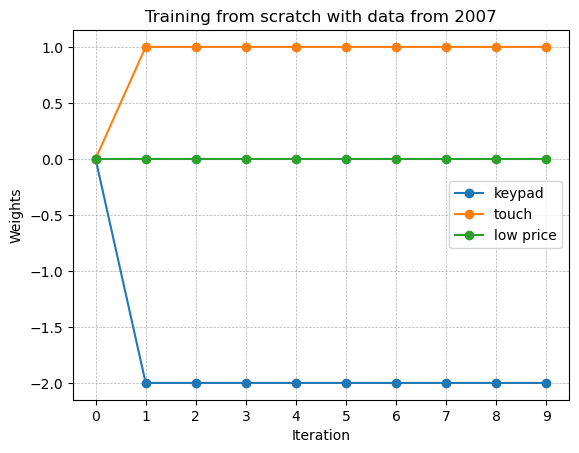

In [56]:
# Plot training process
plt.title("Training from scratch with data from 2007")
plt.plot(weights_2007_new['iteration'], weights_2007_new['keypad'], label='keypad', marker='o')
plt.plot(weights_2007_new['iteration'], weights_2007_new['touch'], label='touch', marker='o')
plt.plot(weights_2007_new['iteration'], weights_2007_new['low_price'], label='low price', marker='o')
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(weights_2007_new['iteration'])
plt.show()

## Compare retraining with training

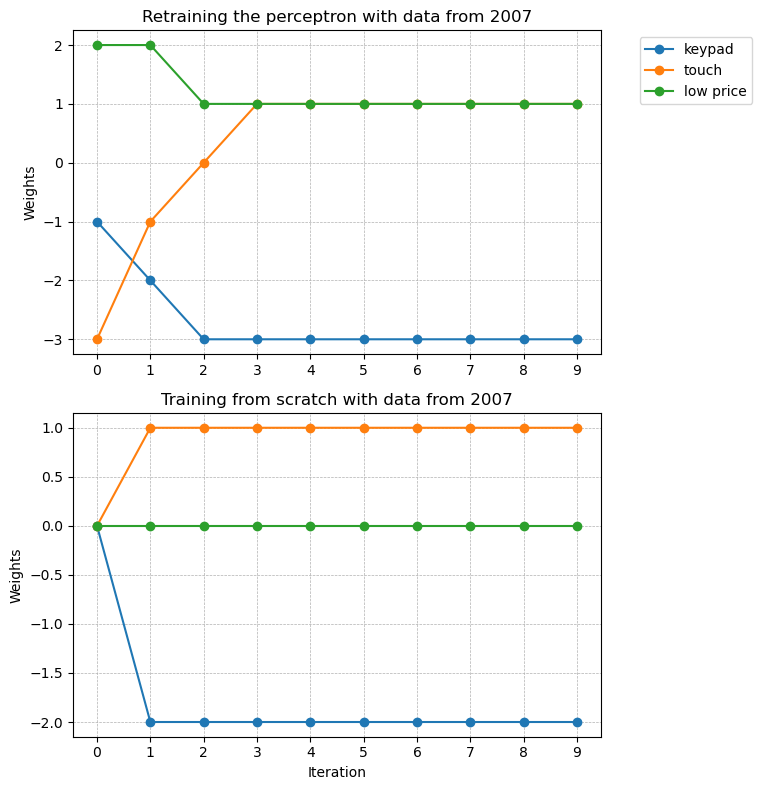

In [57]:
# Plot both learning processes in one chart
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# Plotting for the first dataset in the top subplot
axs[0].set_title('Retraining the perceptron with data from 2007')
axs[0].plot(weights_2007['iteration'], weights_2007['keypad'], label='keypad', marker='o')
axs[0].plot(weights_2007['iteration'], weights_2007['touch'], label='touch', marker='o')
axs[0].plot(weights_2007['iteration'], weights_2007['low_price'], label='low price', marker='o')
axs[0].set_xlabel('')
axs[0].set_ylabel('Weights')
axs[0].legend(loc='upper right', bbox_to_anchor=(1.3, 1))
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[0].set_xticks(weights_2007['iteration'])

# Plotting for the second dataset in the bottom subplot
axs[1].set_title('Training from scratch with data from 2007')
axs[1].plot(weights_2007_new['iteration'], weights_2007_new['keypad'], label='keypad', marker='o')
axs[1].plot(weights_2007_new['iteration'], weights_2007_new['touch'], label='touch', marker='o')
axs[1].plot(weights_2007_new['iteration'], weights_2007_new['low_price'], label='low price', marker='o')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Weights')
# axs[1].legend()
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[1].set_xticks(weights_2007_new['iteration'])

# Adjust layout for better spacing
plt.tight_layout()

# Save img and show the plot
plt.savefig(IMG_COMPARISON_PATH, dpi=300)
plt.show()